<a href="https://colab.research.google.com/github/piyush-pk47/SQL-Leetcode-Challenge/blob/master/imgSegMentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [2]:
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
! kaggle datasets download -d sachinkumar413/alzheimer-mri-dataset

 96% 27.0M/28.0M [00:00<00:00, 150MB/s] 
100% 28.0M/28.0M [00:00<00:00, 137MB/s]


In [4]:
import zipfile
zip_ref=zipfile.ZipFile("/content/alzheimer-mri-dataset.zip","r")
zip_ref.extractall('/content')
zip_ref.close();

In [5]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import random
from tqdm.notebook import tqdm
np.random.seed(1)

In [11]:
paths = glob.glob(r'/content/Dataset/Moderate_Demented/*')

In [12]:
orig=np.array([np.asarray(Image.open(img)) for img in paths])
orig.shape

(64, 128, 128)

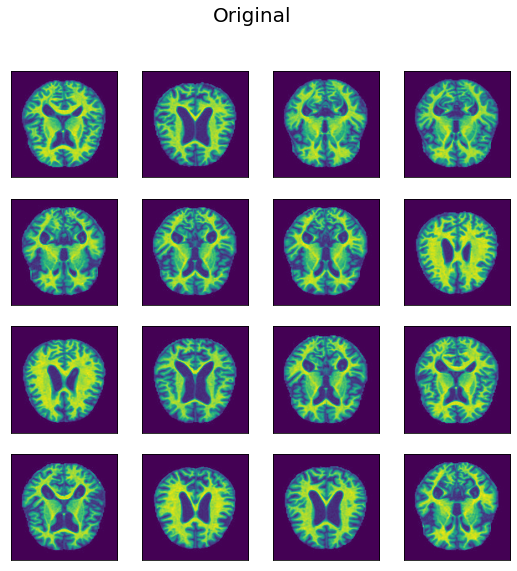

In [13]:
plt.figure(figsize=(9,9))
for i, img in enumerate(orig[0:16]):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img)
plt.suptitle("Original", fontsize=20)
plt.show()

In [17]:
thresh = [cv2.threshold(img, np.mean(img), 255, cv2.THRESH_BINARY_INV)[1] for img in tqdm(orig)]

  0%|          | 0/64 [00:00<?, ?it/s]

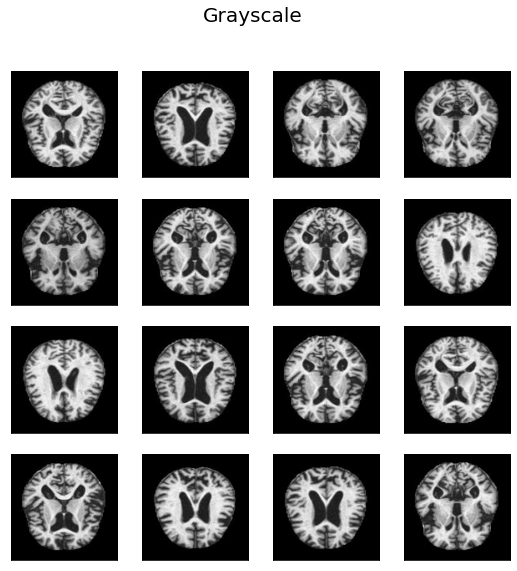

In [18]:
plt.figure(figsize=(9,9))
for i, img in enumerate(orig[0:16]):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))
plt.suptitle("Grayscale", fontsize=20)
plt.show()

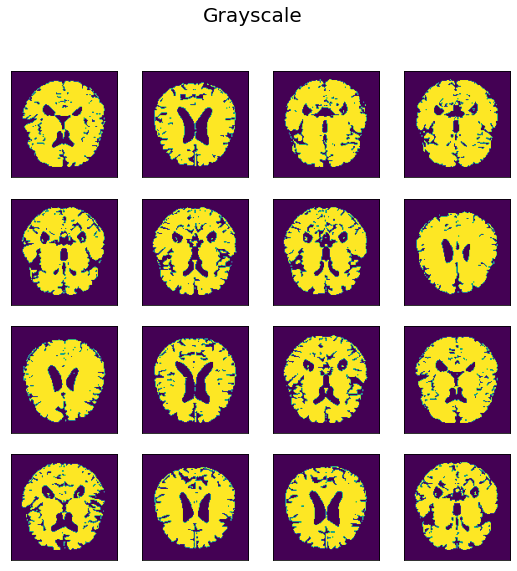

In [23]:
plt.figure(figsize=(9,9))
for i, img in enumerate(thresh[0:16]):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(cv2.threshold(img, np.mean(img), 255, cv2.THRESH_BINARY_INV)[1])
plt.suptitle("Grayscale", fontsize=20)
plt.show()

In [24]:
edges = [cv2.dilate(cv2.Canny(img, 0, 255), None) for img in tqdm(thresh)]

  0%|          | 0/64 [00:00<?, ?it/s]

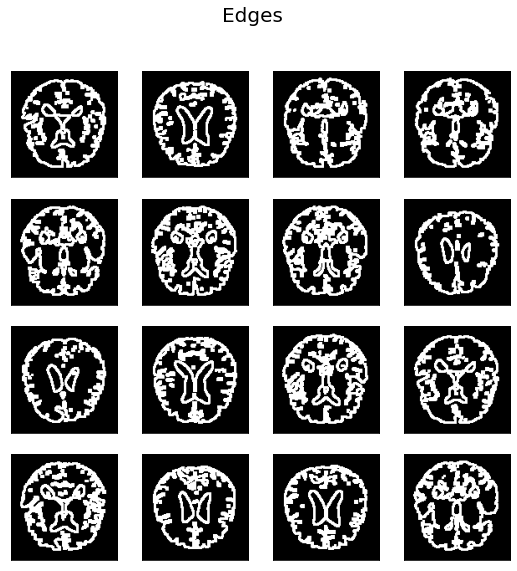

In [25]:
plt.figure(figsize=(9,9))
for i, edge in enumerate(edges[0:16]):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(cv2.cvtColor(edge, cv2.COLOR_GRAY2RGB))
plt.suptitle("Edges", fontsize=20)
plt.show()

In [26]:
cnt=sorted(cv2.findContours(img, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2], key=cv2.contourArea)[-1]

In [28]:
mask = np.zeros((256,256), np.uint8)

In [36]:
masked = []
segmented = []
for i, img in tqdm(enumerate(edges)):
    cnt = sorted(cv2.findContours(img, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2], key=cv2.contourArea)[-1]
    mask = np.zeros((256,256), np.uint8)
    masked.append(cv2.drawContours(mask, [cnt],-1, 255, -1))
    dst = cv2.bitwise_and(orig[i], orig[i])
    segmented.append(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

0it [00:00, ?it/s]

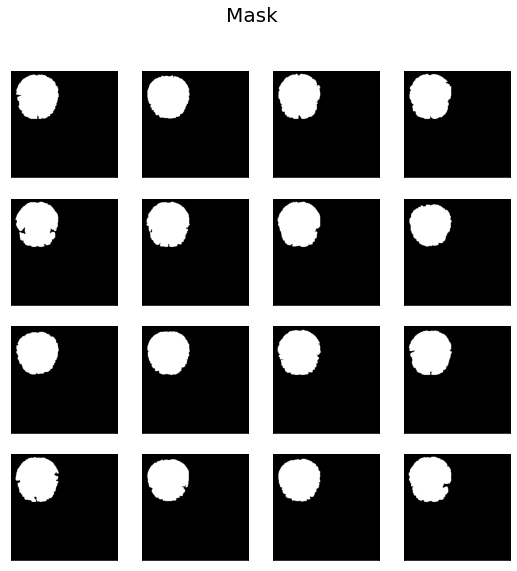

In [37]:
plt.figure(figsize=(9,9))
for i, maskimg in enumerate(masked[0:16]):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(maskimg, cmap='gray')
plt.suptitle("Mask", fontsize=20)
plt.show()

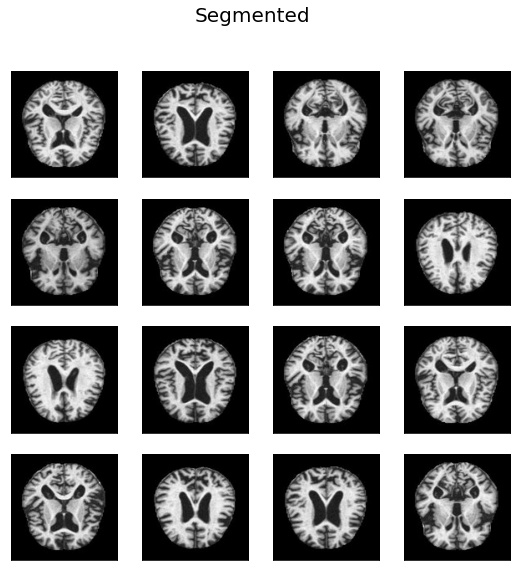

In [38]:
plt.figure(figsize=(9,9))
for i, segimg in enumerate(segmented[0:16]):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(cv2.cvtColor(segimg, cv2.COLOR_BGR2RGB))
plt.suptitle("Segmented", fontsize=20)
plt.show()